# Lab 5: Data manipulation


In [1]:
options(repr.plot.width=6, repr.plot.height=5)

require(tidyverse)
require(stringr)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.4.3”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘forcats’ was built under R version 3.4.3”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Tibble miscellanea

Remember that you can create tibbles with `tibble` or `tribble`, where `tribble` is often easier to create small tables that are readible in your code.

In [2]:
mydat = tibble(x=c('a', 'b'), y=c(2, 1), `z z`=c(3.6, 8.5))

mydat1 = tribble(
  ~x, ~y, ~`z z`,
  'a', 2, 3.6,
  'b', 1, 8.5
)

mydat
identical(mydat, mydat1)

x,y,z z
a,2,3.6
b,1,8.5


[1] TRUE

### Subsetting

For selecting variables out of tibbles, you can use `$` or `[[ ]]` (in addition to `select`).
* `$` only selects by name and requires you to hard-code in the variable name.
* `[[ ]]` selects by name or position and takes an argument, which can be a hard-coded string or a variable.


In [3]:
mydat

x,y,z z
a,2,3.6
b,1,8.5


In [4]:
mydat$x

[1] "a" "b"

In [5]:
mydat[['x']]
mydat[[1]]

[1] "a" "b"

[1] "a" "b"

In [6]:
mydat[[x]]

ERROR: Error in `[[.tbl_df`(mydat, x): object 'x' not found


In [8]:
mydat$`z z`
mydat[['z z']]

[1] 3.6 8.5

[1] 3.6 8.5

In [9]:
varname = 'z z'
mydat[[varname]]

[1] 3.6 8.5

## Data Import

The package `readr` (part of `tidyverse`) contains several functions for reading in flat data.

`read_csv` reads standard comma-delimited files. There are variants like `read_csv2` (semicolon-delimited) and `read_tsv` (tab-delimited), while `read_delim` allows reading in files with any delimiter.

Also note that the equivalents for writing/saving data files also exist, called `write_csv`, etc.

Note that these are variants of `read.table`, `read.csv`, `write.table`, etc. which are a part of base R and can also be used for reading in files.

In [11]:
mtcars$car = rownames(mtcars)

write_csv(mtcars, "mtcars.csv")
mydat = read_csv("mtcars.csv")
head(mydat)

Parsed with column specification:
cols(
  mpg = col_double(),
  cyl = col_integer(),
  disp = col_double(),
  hp = col_integer(),
  drat = col_double(),
  wt = col_double(),
  qsec = col_double(),
  vs = col_integer(),
  am = col_integer(),
  gear = col_integer(),
  carb = col_integer(),
  car = col_character()
)


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Datsun 710
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Valiant


Notice that `readr` gets its column names from the first row of the CSV. If the first lines are metadata instead of column names, you can use the following to skip those lines.

In [12]:
read_csv(
"The first line of metadata
The second line of metadata
x,y,z
1,2,3", skip=2)

x,y,z
1,2,3


In [13]:
read_csv(
"# A comment I want to skip
x,y,z
1,2,3", comment='#')

x,y,z
1,2,3


Sometimes the columns don't have names. Then you can tell `readr` to create the column names.

In [14]:
read_csv(
"1,2,3
4,5,6", col_names=FALSE)

X1,X2,X3
1,2,3
4,5,6


In [15]:
read_csv(
"1,2,3
4,5,6", col_names=c("x", "y", "z"))

x,y,z
1,2,3
4,5,6


Another option that commonly needs tweaking is `na`: this specifies the value (or values) that are used to represent missing values in your file:

In [16]:
read_csv(
"a,b,c
1,2,.", na='.')

a,b,c
1,2,NA


## `gather` and `spread`

Remember that `gather` transforms datasets from "wide" to "long," collecting different column names into a variable. `spread` does the opposite, turning "long" datasets into "wide" ones by spreading out a variable's values into the column names.

In [17]:
grades_wide = tribble(
  ~name,  ~`2015`, ~`2016`, ~`2017`,
'Roger',       83,      89,      93,
  'Jon',       92,      90,      93)
grades_wide

name,2015,2016,2017
Roger,83,89,93
Jon,92,90,93


In [18]:
grades_long = grades_wide %>% gather(key=year, value=grade, `2015`:`2017`)
grades_long

name,year,grade
Roger,2015,83
Jon,2015,92
Roger,2016,89
Jon,2016,90
Roger,2017,93
Jon,2017,93


In [19]:
grades_long %>% spread(key=year, value=grade)

name,2015,2016,2017
Jon,92,90,93
Roger,83,89,93


## MLB Data

This dataset contains information for player-seasons in the American League from 2015 to 2018. For those unfamiliar with baseball:
* `PA`: Plate Appearances, the number of times a player came up to bat.
* `HR`: number of home runs.
* `BBrate`: The number of walks (BBs) as a percentage of plate appearances.
* `BB`: The number of walks.
* `K`: The number of strikeouts.
* `AVG`: A batters batting average.
* `FB`: The number of fly balls a batter hit.

Note: Also recall the functions `unite`, `separate`, and `complete`.

In [20]:
mlb = read_csv('https://raw.githubusercontent.com/rogerfan/stats306_f18_labs/master/mlb.csv')
head(mlb)

Parsed with column specification:
cols(
  year = col_integer(),
  name = col_character(),
  team = col_character(),
  division = col_character(),
  PA = col_integer(),
  HR = col_integer(),
  BBrate = col_character(),
  BB_K = col_character(),
  AVG = col_double(),
  FB = col_integer(),
  playerid = col_integer()
)


year,name,team,division,PA,HR,BBrate,BB_K,AVG,FB,playerid
2016,Abraham Almonte,Indians,Central,194,1,4.1 %,8/42,0.264,43,5486
2017,Abraham Almonte,Indians,Central,195,3,10.3 %,20/46,0.233,34,5486
2015,Adam Moore,Indians,Central,4,0,0.0 %,0/2,0.250,1,9362
2016,Adam Moore,Indians,Central,5,0,0.0 %,0/4,0.000,1,9362
2018,Adam Plutko,Indians,Central,2,0,0.0 %,0/0,0.000,0,15846
2018,Adam Rosales,Indians,Central,21,1,4.8 %,1/5,0.211,7,9682


### Problem 1

Note that `BBrate` and `BB_K` were read in as strings. Clean up these variables and convert them to numeric variables, noting that `BB_K` should be two variables named `BB` and `K`.

In [22]:
dat1 = mlb %>% mutate(BBrate = as.numeric(str_replace(BBrate, ' %', ''))/100) %>%
    separate(BB_K, into = c("BB", "K"), sep="/", convert=TRUE)
head(dat1)

year,name,team,division,PA,HR,BBrate,BB,K,AVG,FB,playerid
2016,Abraham Almonte,Indians,Central,194,1,0.041,8,42,0.264,43,5486
2017,Abraham Almonte,Indians,Central,195,3,0.103,20,46,0.233,34,5486
2015,Adam Moore,Indians,Central,4,0,0.000,0,2,0.250,1,9362
2016,Adam Moore,Indians,Central,5,0,0.000,0,4,0.000,1,9362
2018,Adam Plutko,Indians,Central,2,0,0.000,0,0,0.000,0,15846
2018,Adam Rosales,Indians,Central,21,1,0.048,1,5,0.211,7,9682


### Problem 2

Calculate the HR per FB rate for each team and year. Convert this to a long dataset, so your variables should be `division`, `team`, and `2015`-`2018`, where values are the HR/FB rate. Note that you should ensure that `division` is still in the dataset.

Create a variable called `increased`, which checks if the HR/FB rate was higher in 2018 than it was in 2015 for that team.

In [49]:
dat2 = mlb %>% group_by(division, team, year) %>% summarize(HR_FB=sum(HR)/sum(FB)) %>%
    spread(key=year, value=HR_FB) %>% mutate(increased = `2018` > `2015`)

head(dat2)

division,team,2015,2016,2017,2018,increased
Central,Indians,0.09964727,0.1198402,0.1314103,0.12936849,TRUE
Central,Royals,0.08997253,0.1041215,0.1225681,0.10319635,TRUE
Central,Tigers,0.09611152,0.1376147,0.1077051,0.09244314,FALSE
Central,Twins,0.10641201,0.1308677,0.1312420,0.09869494,FALSE
Central,White_Sox,0.10594947,0.1220799,0.1352785,0.13573620,TRUE
East,Blue_Jays,0.16168582,0.1460446,0.1417910,0.13721264,FALSE


Turn this back into a "long" dataset and create a plot of HR/FB rate on year. Color it by `team`, facet it by `division`, and choose the linetype according to the `increased` variable.

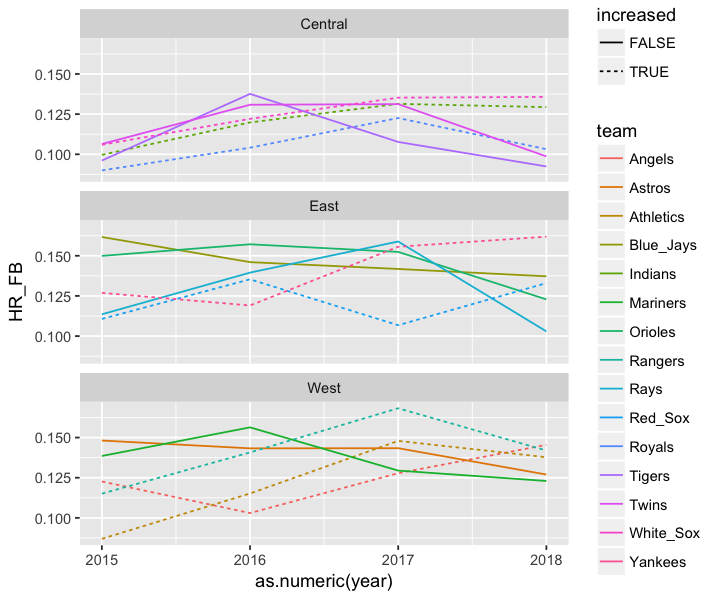

In [47]:
dat2b = dat2 %>% gather(key=year, value=HR_FB, `2015`:`2018`)

ggplot(dat2b, aes(color=team, linetype=increased, x=as.numeric(year), y=HR_FB)) + 
    geom_line() +
    facet_wrap(~ division, nrow=3)

### Problem 3

Go back to `mlb` and calculate total HRs and PAs per year per team. Create a wide version of this dataset. So there should be a `team` variable, then eight variables tracking values: `HR_2015`, `HR_2016`, `HR_2017`, `HR_2018`, `PA_2015`, `PA_2016`, `PA_2017`, and `PA_2018`.

Hint: Once you calculate the values you can use a `gather`, `unite`, and `spread` in that order to create the wide version.

In [25]:
dat3 = mlb %>% group_by(team, year) %>% summarize(HR=sum(HR), PA=sum(PA)) %>%
    gather(key=variable, value=value, HR, PA) %>%
    unite(var_year, variable, year) %>%
    spread(key=var_year, value=value)
head(dat3)

team,HR_2015,HR_2016,HR_2017,HR_2018,PA_2015,PA_2016,PA_2017,PA_2018
Angels,169,155,165,192,5519,5901,5178,5336
Astros,224,193,232,201,5866,5851,5984,5997
Athletics,124,138,188,227,5573,4487,4687,6248
Blue_Jays,211,216,209,191,5196,6015,5842,5313
Indians,113,180,205,211,4758,5896,6051,6219
Mariners,169,220,190,166,5002,6079,5789,5609
